#**IMPORTING THE DEPENDENCIES**

In [ ]:
# IMPORTING THE REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#**LOADING THE DATASET**

In [ ]:
# READING THE EXCEL FILE AND CREATING THE DATAFRAME USING PANDAS FUNCTION.
customer_df = pd.read_excel('/content/customer_churn_large_dataset.xlsx')
customer_df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


#**DATA EXPLORATION**

**EXPLORING THE DATASET'S FEATURES, DATATYPES, ATTRIBUTES PRESENT, UNIQUE VALUES, NULL VALUES, INFORMATION, DIMENTION ETC**

In [ ]:
# CHECKING THE INFORMATION OF THE DATASET SUCH AS DATA TYPES, AND COLUMN NAMES
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
# CHECKING THE SHAPE/DIMENTION OF THE DATASET
customer_df.shape

(100000, 9)

In [ ]:
# CHECKING FOR NULL VALUES IN THE DATASET
customer_df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
# CHECKING THE STATISTICAL MEASURES OF THE DATASET
customer_df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


#**DATA VISUALIZATION**

**LINE PLOT**

<ipython-input-36-2780a2e58cc6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=customer_df, x='Location', y='Subscription_Length_Months', ci=None,


<Axes: xlabel='Location', ylabel='Subscription_Length_Months'>

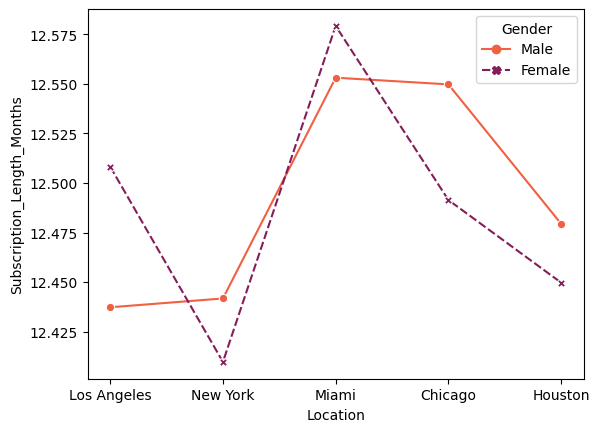

In [ ]:
# CREAING THE LINE CHART TO UNDERSTAND THE "SUBSCRIPTION LENGTH" FOR MALE AND FEMALE FOR DIFFERENT LOCATION.
sns.lineplot(data=customer_df, x='Location', y='Subscription_Length_Months', ci=None,
             hue='Gender', style='Gender', palette='rocket_r', markers=True)

**COUNT-PLOT**

<Axes: xlabel='Churn', ylabel='count'>

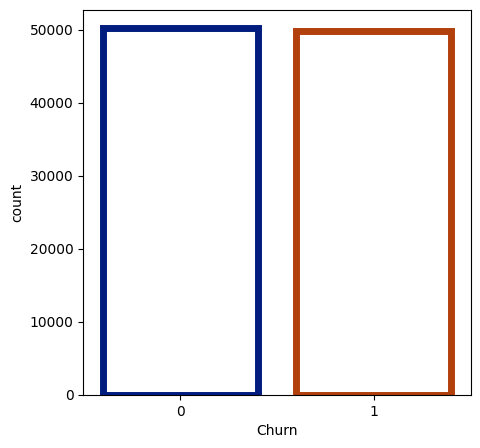

In [ ]:
# COUNT PLOT HAS BEEN CREATED TO UNDERSTAND THE CUSTOMER CHURNED.
plt.figure(figsize=(5,5))

sns.countplot(data=customer_df, x='Churn', facecolor = (0,0,0,0), linewidth=5, edgecolor=sns.color_palette('dark',3))

#**DATA PRE-PROCESSING**

**NOW WE WILL PRE-PROCESS THE DATASET BEFORE FEEDING IT TO OUR MACHINE LEARNING ALGORITHM**

In [ ]:
# HERE, WE ARE DROPPING THE COLUMNS SUCH AS "CUSTOMERID" AND "NAME" BECAUSE THESE COLUMNS DOES NOT HOLD RELEVENCE.
customer_df.drop(['CustomerID', 'Name'], axis='columns', inplace=True )
customer_df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [ ]:
# FOR "CHURN" COLUMN WE ARE CHECKING THE COUNT OF LABELS '0' and '1'.
customer_df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

**0------> Not Churned**

**1------> Churned**

In [ ]:
# HERE, WE ARE REPLACING THE GENDER COLUMN WITH NUMERICAL VARIABLES.
customer_df['Gender'].replace({'Female':1, 'Male':0}, inplace=True)
customer_df['Gender'].unique()

array([0, 1])

In [ ]:
# NOW CHECKING FOR THE UNIQUE VALUES OF 'LOCATION' COLUMN
customer_df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [ ]:
# CONVERTING THE CATEGORICAL VARIABLES TO NUMERICAL VARIABLES FOR 'LOCATION' COLUMN
customer_df.replace({'Location':{'Los Angeles':0, 'New York':1, 'Miami':2, 'Chicago':3, 'Houston':4}}, inplace=True)

**SEPARATING THE TARGET VARIABLE FROM THE DATASET**

In [ ]:
# HERE, WE ARE DROPPING OUR TARGET VARIABLE FROM OUT DATASET AND STORING IT IN DIFFERENT VARIABLE
X = customer_df.drop('Churn', axis='columns')
Y = customer_df['Churn']

#**TRAIN TEST SPLIT**

In [ ]:
# NOW, SPLITTING THE DATASET INTO TRAINING DATA AND TESTING DATA
# TAKING 20% AS TEST DATA AND 80% AS TRAINING DATA

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [ ]:
# CHECKING THE DIMENTION OF OUR TRAIN DATASET
X_train.shape

(80000, 6)

In [ ]:
# CHECKING THE DIMENTION OF OUR TEST DATASET
Y_train.shape

(80000,)

#**DATA STANDARDIZATION**

**SCALING THE NUMERICAL VALUES OF OUR DATASET INTO A COMMON RANGE OF '0' TO '1'**


In [ ]:
# IMPORTING THE STANDARD SCALER FUNCTION
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# FITTING OUR DATASET TO THE FUNCTION
standardized_data = scaler.fit_transform(X)

#STORING THE SCALED DATA TO 'X' VARIABLE AND 'CHURN' TO Y VARIABLE
X = standardized_data
Y = customer_df["Churn"]

# PRINTING THE VALUES OF 'X' AND 'Y'
print(X)
print(Y)

[[ 1.24167039 -1.00432937 -1.41489431  0.65111499  0.41060598 -0.29428898]
 [ 1.17622625  0.99568929 -0.70877818 -1.65887854 -0.80537409 -0.78485174]
 [-1.31065114  0.99568929 -1.41489431 -1.08138015  1.0092043   1.42268068]
 ...
 [ 1.30711454 -1.00432937  0.70345407  0.65111499  1.5351404  -0.17931334]
 [ 0.45634069  0.99568929 -0.70877818  1.08423877 -0.78115335  1.22338955]
 [-1.11431871  0.99568929 -1.41489431  0.93986418  0.56927655 -0.7771867 ]]
0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64


#**MODEL BUILDING**

#**1. LOGISTIC REGRESSION MODEL**

In [ ]:
# Using Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# FITTING OUR TRAINING DATA TO THE MODEL
model.fit(X_train, Y_train)


LogisticRegression()

#**MODEL EVALUATION**

**ACCURACY OF TRAINING DATA**

In [ ]:
# PREDICTING VALUES FOR TRAINING DATASET
X_train_prediction = model.predict(X_train)

# CHECKING THE ACCURACY OF THE MODEL ON TRAINING DATA
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# DISPLAYING THE ACCURACY
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.5042375


**ACCURACY OF TESTING DATA**

In [ ]:
# PREDICTING VALUES FOR TESTING DATASET
X_test_prediction = model.predict(X_test)

# CHECKING THE ACCURACY OF THE MODEL ON TESTING DATA
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# DISPLAYING THE ACCURACY
print('Accuracy on test data: ', test_data_accuracy)

Accuracy on test data:  0.49475


**ACCURACY OF LOGISTIC REGRESSION MODEL IS :-**

**ON TRAINING DATA------> 50%**

**ON TESTING DATA-------> 49%**

#**2. ARTIFICIAL NEURAL NETWORK**

In [ ]:
# USING NEURAL NETWORK MODEL
from sklearn.neural_network import MLPClassifier
model_3 = MLPClassifier()

# FITTING OUR TRAINING DATA TO THE MODEL
model_3.fit(X_train, Y_train)

MLPClassifier()

#**MODEL EVALUATION**

**ACCURACY OF TRAINING DATA**

In [ ]:
# PREDICTING VALUES FOR TRAINING DATASET
X_train_prediction = model.predict(X_train)

# CHECKING THE ACCURACY OF THE MODEL ON TRAINING DATA
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# DISPLAYING THE ACCURACY
print('Accuracy on training data: ', training_data_accuracy)


Accuracy on training data:  0.5042375


**ACCURACY ON TESTING DATA**

In [ ]:
# PREDICTING VALUES FOR TESTING DATASET
X_test_prediction = model.predict(X_test)

# CHECKING THE ACCURACY OF THE MODEL ON TESTING DATA
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# DISPLAYING THE ACCURACY
print('Accuracy on test data: ', test_data_accuracy)


Accuracy on test data:  0.49475


**ACCURACY OF ARTIFICIAL NEURAL NETWORK IS:-**

**ON TRAINING DATA-------> 50%**

**ON TESTING DATA -------> 49%**

#**HYPERPARAMETER TUNING**

In [ ]:
# USING "GridSearchCV" FOR TUNING THE HYPERPARAMETERS
# Grid Search Exhaustively search through all possible combinations of hyperparameters.


# IMPORTING THE GRID SEARCH FROM SKLEARN
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']  # Use only 'l2' penalty with 'lbfgs' solver
}

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(solver='lbfgs')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
             scoring='accuracy')

**CHECKING THE BEST PARAMETERS AND ACCURACY**

In [ ]:
# CHECKING FOR BEST MODEL AND BEST PARAMETERS
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# USE THE BEST MODEL TO PREDICT LABELS ON TEST DATA
Y_pred = best_model.predict(X_test)

# CALCULATE THE ACCURACY OF THE MODEL
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

# DISPLAYING THE BEST PARAMETERS AND ACCURACY ACHIEVED
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)


Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Test Accuracy: 0.4948


#**MAKING A PREDICTIVE SYSTEM**

In [ ]:
# SINCE, WE HAVE ENCODED THE GENDER COLUMN AS '1' FOR FEMALE AND '0' FOR MALE.
# SO, WILL TAKE THE INPUT IN THAT FORMAT ONLY.
# WE HAVE ALSO ENCODED THE 'LOCATION' COLUMN AS:-
# 'Los Angeles'---> 0, 'New York'---> 1, 'Miami'---> 2, 'Chicago'---> 3, 'Houston'---> 4

# TAKING THE INPUT DATA
input_data = (62, 1, 1, 19, 61.65, 351)

# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The person is not likely to churn")
else:
    print("The person is likely to churn")


[0]
The person is not likely to churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Our Model has predicted correctly (above) for this input data , let's check for one more instance.**

In [ ]:
import numpy as np

# Define the input data (example values)
input_data = [27, 1, 0, 19, 76.57, 173]  # Assuming 1 for Female, 1 for New York

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make predictions using the best model obtained from hyperparameter tuning
prediction = best_model.predict(input_data_reshaped)

if prediction[0] == 0:
    print("The person is not likely to churn")
else:
    print("The person is likely to churn")


The person is likely to churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**For this instance also, our model has predicted correctly.**

#**SAVING THE TRAINED MODEL**

In [ ]:
# Importing the Pickle library to save the model
import pickle

In [ ]:
# Saving the model with name "trained_model"
filename = 'trained_model'

# Saving the model, and writing it in binary.
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Loading the Saved Model
loaded_model = pickle.load(open('trained_model', 'rb'))

In [ ]:
import numpy as np

# Define the input data (example values)
input_data = [27, 1, 0, 19, 76.57, 173]  # Assuming 1 for Female, 1 for New York

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make predictions using the best model obtained from hyperparameter tuning
prediction = best_model.predict(input_data_reshaped)

if prediction[0] == 0:
    print("The person is not likely to churn")
else:
    print("The person is likely to churn")


The person is likely to churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
